In [ ]:
#https://www.kaggle.com/dpamgautam/video-file-for-lane-detection-project

1. edge dection

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
!ls -al 'gdrive/My Drive/darknet'

total 20
drwx------ 2 root root 4096 Jun  1 23:06 cfg
drwx------ 2 root root 4096 Jun  1 23:06 data
drwx------ 2 root root 4096 Jun  8 02:05 models
drwx------ 2 root root 4096 Jun  8 04:11 run
drwx------ 2 root root 4096 Jun  1 23:06 weights


In [4]:
file_name = 'gdrive/My Drive/darknet/data/test_video.mp4'

In [5]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
import IPython

In [8]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True)

  #convert the image to grayscale
  gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

  height, width = gray.shape
  
  # GaussianBlurs for refucing noise
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  
  #canny edge detection
  canny = cv2.Canny(blur, 40, 130)
  
  #mask
  center = (width//2, height//2)
  mask = np.zeros(frame.shape[:2], dtype='uint8')

  poly_height = int(0.60 * height)
  poly_left = int(0.47 * width)
  poly_right = int(0.53 * width)
  polygons = np.array([[(0, height), (poly_left, poly_height), (poly_right, poly_height), (width, height)]])
  cv2.fillPoly(mask, polygons, 255)

  #bitwise operation between poly and mask
  masked = cv2.bitwise_and(canny, mask)

  #. Lane detection - Hough Transform
  lines = cv2.HoughLinesP(masked, 2, np.pi/180, 20, np.array([]), 20, 10)


  for line in lines:
    for x1, y1, x2, y2 in line:
      cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

  cv2_imshow(frame)

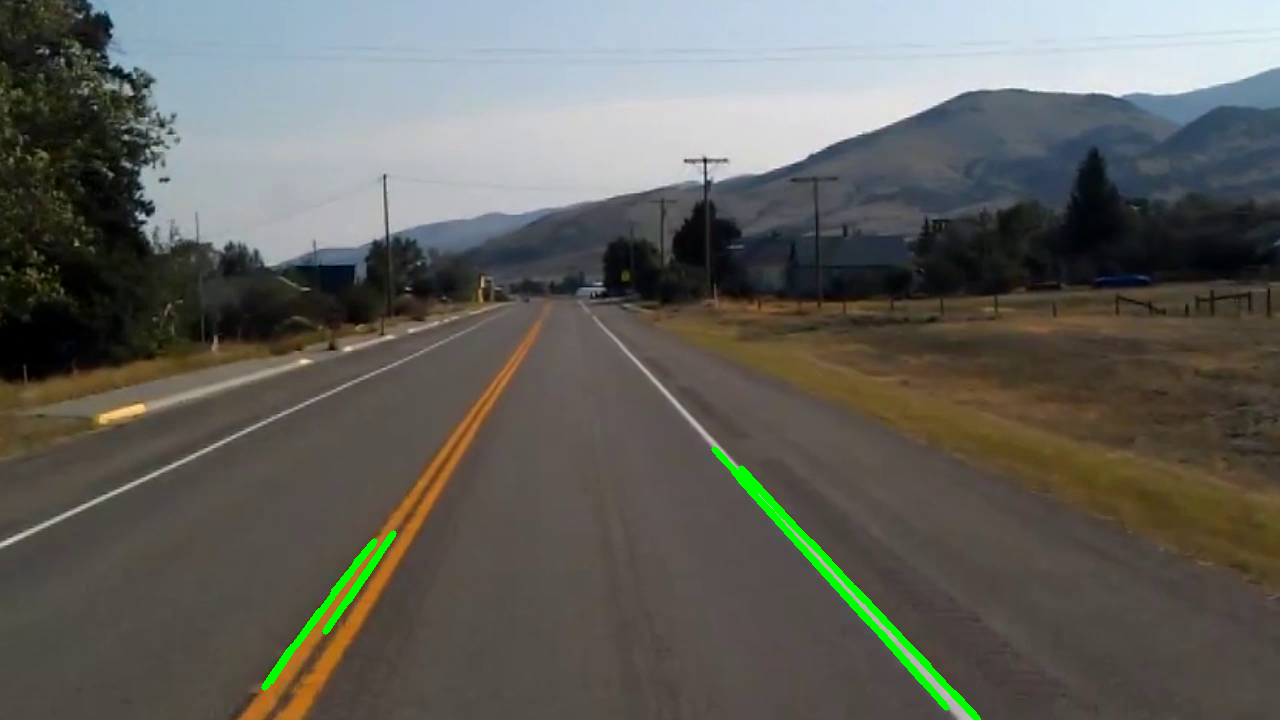

In [ ]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print('opening video capture')
  exit(0)

while True:
  ret, frame = cap.read()
  if frame is None:
    print('captured frame - break')
    break
  detectAndDisplay(frame)